In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/User/Desktop/ML-model-main/datasets/bank-additional/bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# Converti le variabili categoriche usando pd.Categorical per un uso più efficiente della memoria e performance migliori
categorical_columns = ['job', 'marital', 'education', 'contact', 'day_of_week' , 'month', 'poutcome']
for col in categorical_columns:
    data[col] = pd.Categorical(data[col])

# Converti le variabili binarie. Se sono già nel formato stringa "yes"/"no", puoi convertirle in un formato numerico booleano
binary_columns = ['default', 'housing', 'loan', 'y']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Assicurati che tutte le variabili numeriche siano del tipo corretto
# Converti le colonne numeriche a int64 o float64 a seconda della natura dei dati
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Dato che non ho visto la colonna 'balance' nell'output precedente, ho assunto che potrebbe essere stata nominata diversamente nel tuo DataFrame
# Se la colonna esiste con un nome diverso, assicurati di aggiungerla all'elenco delle `numeric_columns`

# Controlla il nuovo tipo di dati per ogni colonna
print(data.dtypes)


age                  int64
job               category
marital           category
education         category
default            float64
housing            float64
loan               float64
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Statistiche descrittive per le colonne numeriche
print(data.describe())


               age       default       housing          loan      duration  \
count  41188.00000  32591.000000  40198.000000  40198.000000  41188.000000   
mean      40.02406      0.000092      0.536743      0.155431    258.285010   
std       10.42125      0.009594      0.498654      0.362319    259.279249   
min       17.00000      0.000000      0.000000      0.000000      0.000000   
25%       32.00000      0.000000      0.000000      0.000000    102.000000   
50%       38.00000      0.000000      1.000000      0.000000    180.000000   
75%       47.00000      0.000000      1.000000      0.000000    319.000000   
max       98.00000      1.000000      1.000000      1.000000   4918.000000   

           campaign         pdays      previous  emp.var.rate  cons.price.idx  \
count  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   
mean       2.567593    962.475454      0.172963      0.081886       93.575664   
std        2.770014    186.910907      0.494901      1

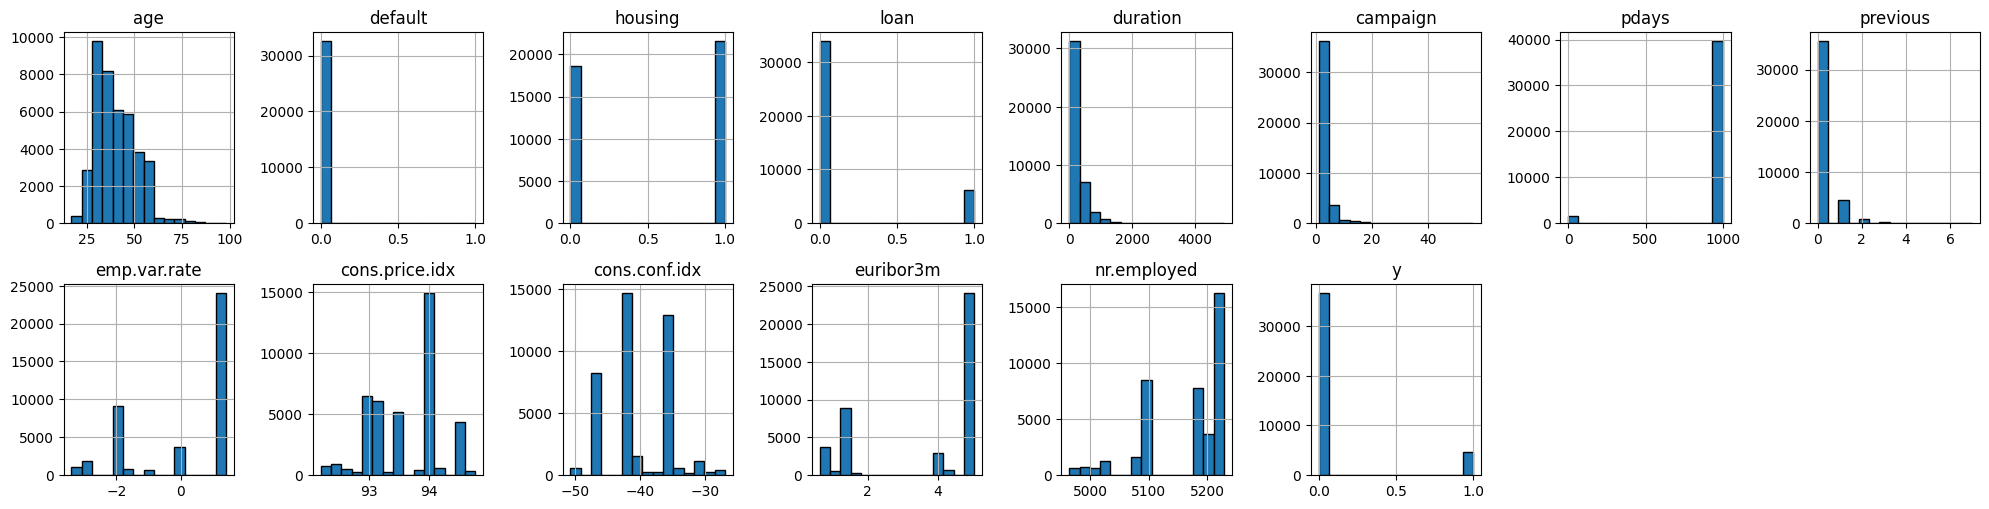

In [5]:
# Distribuzione delle variabili numeriche con istogrammi
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[num_columns].hist(bins=15, figsize=(20, 10), layout=(4, 8), edgecolor='black')
plt.tight_layout()
plt.show()



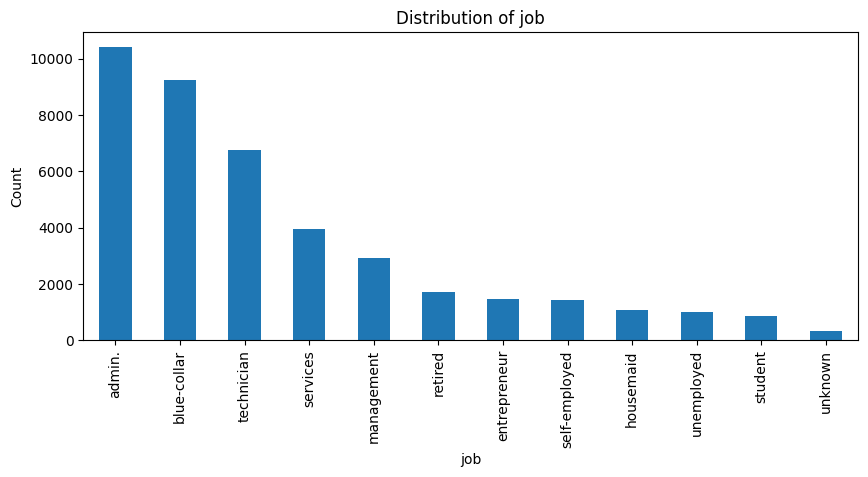

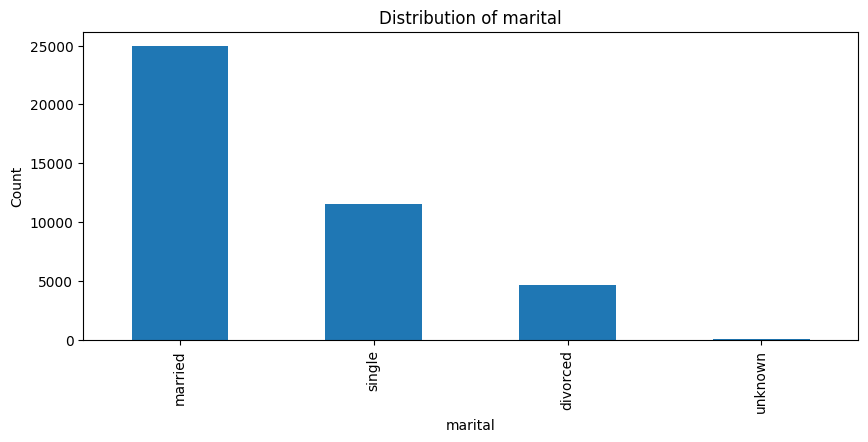

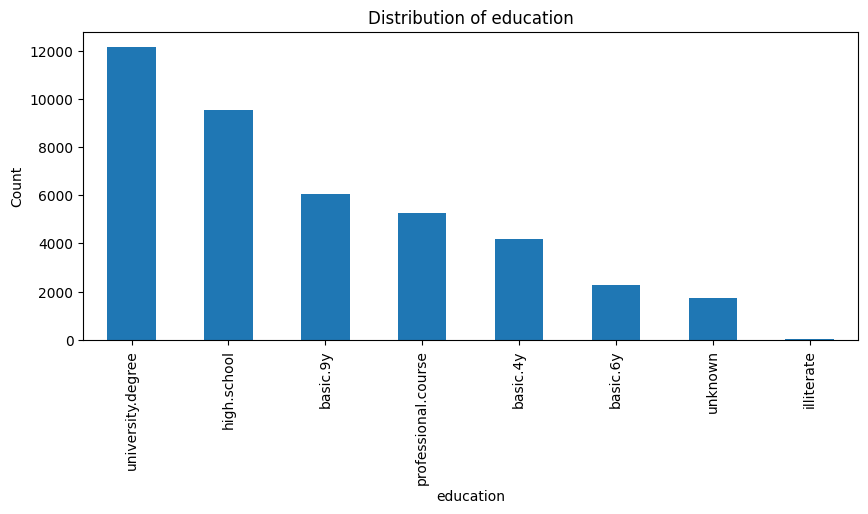

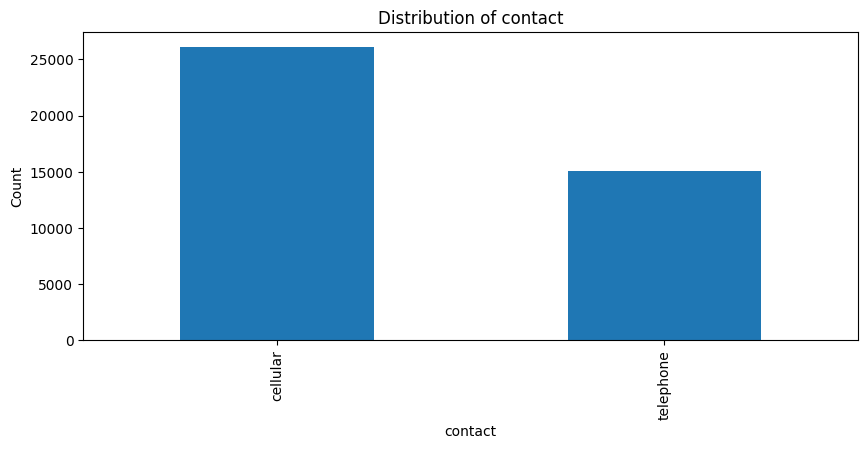

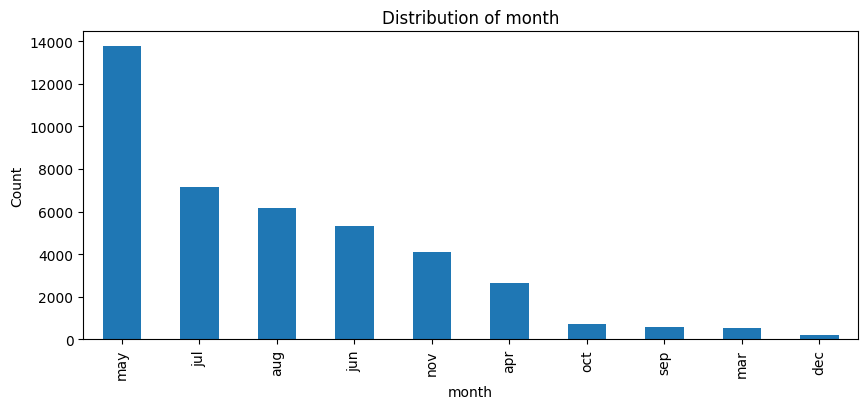

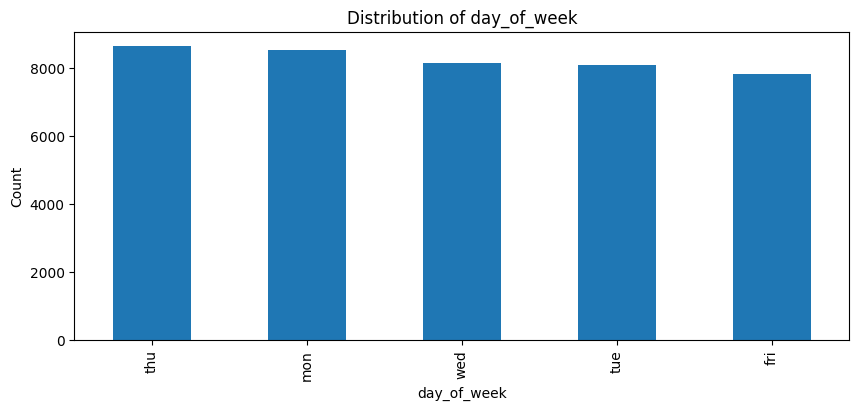

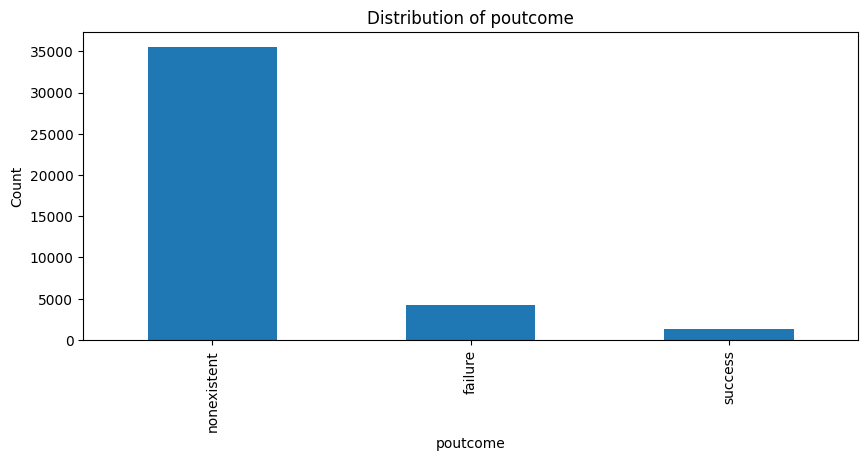

In [6]:
# Conteggio dei valori per le variabili categoriche e visualizzazione con bar plot
cat_columns = data.select_dtypes(include=['category']).columns
for col in cat_columns:
    plt.figure(figsize=(10, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

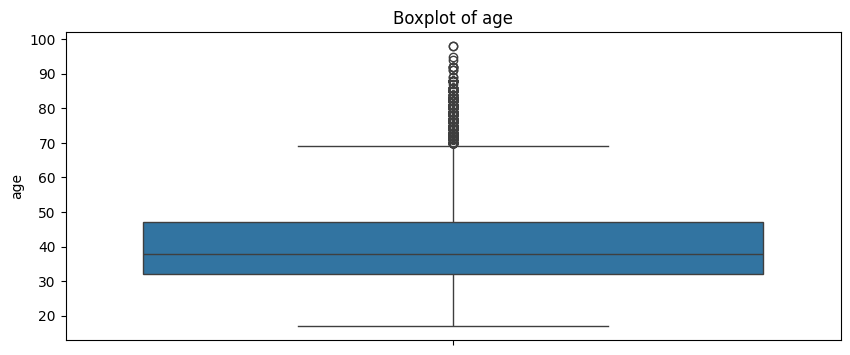

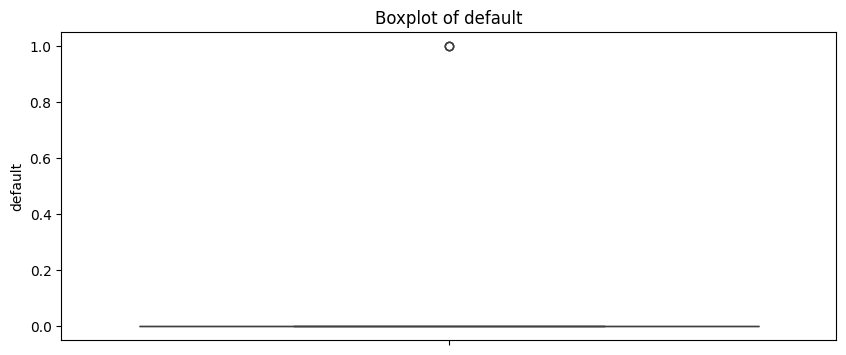

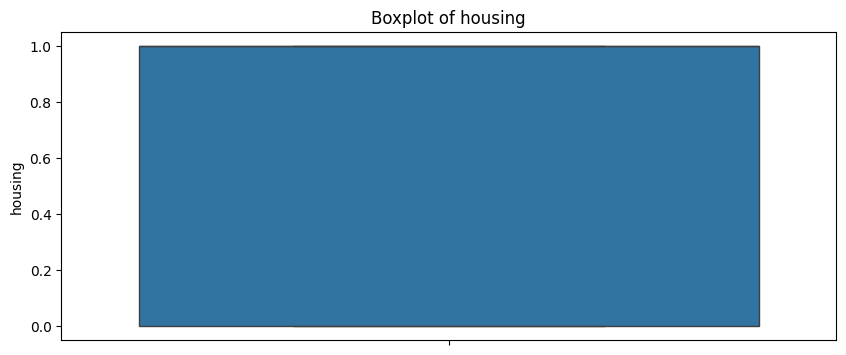

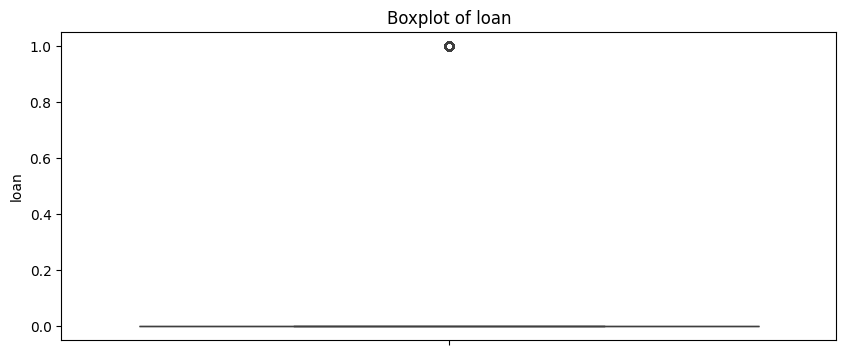

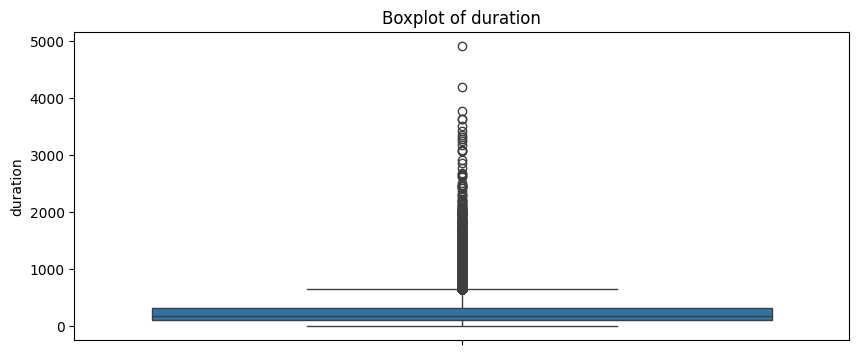

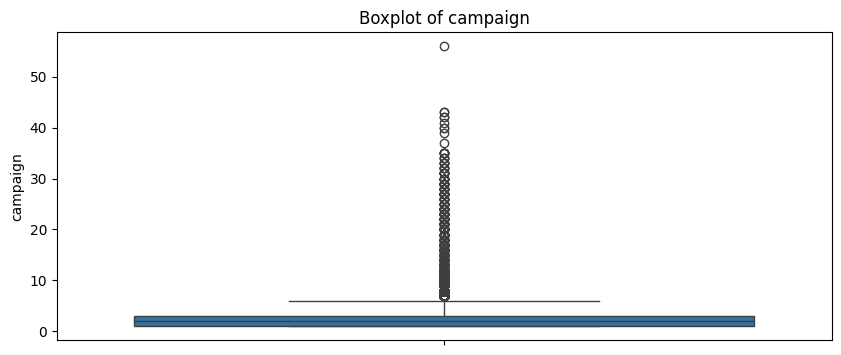

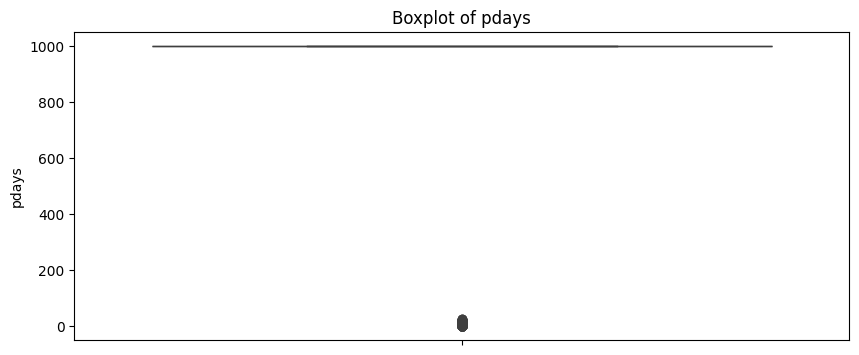

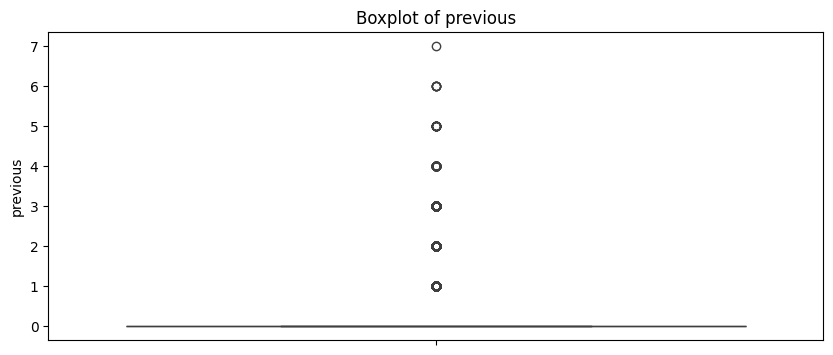

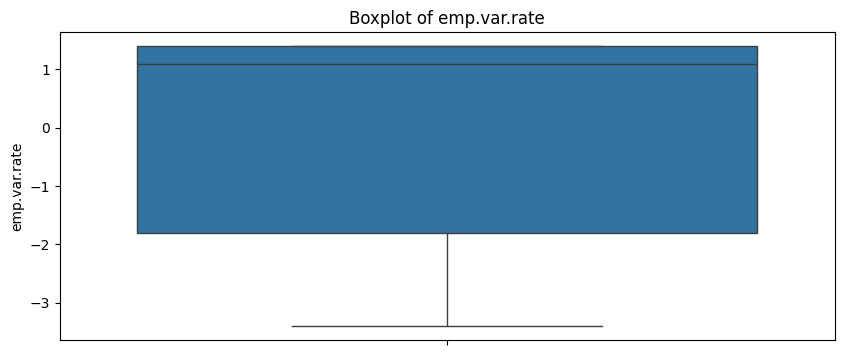

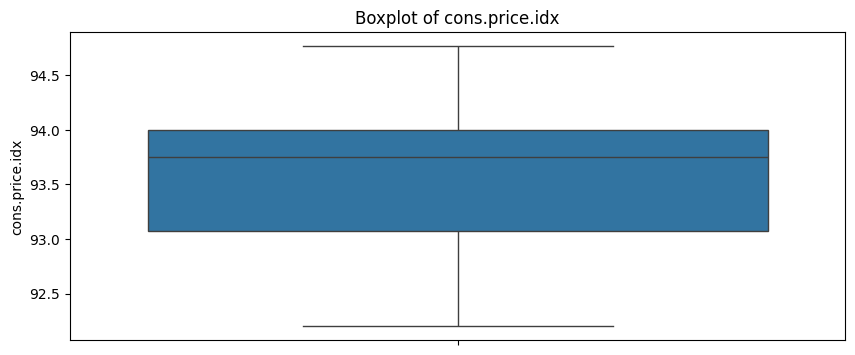

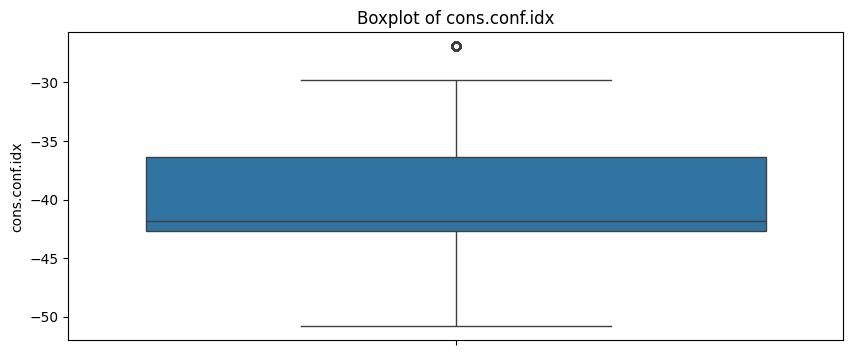

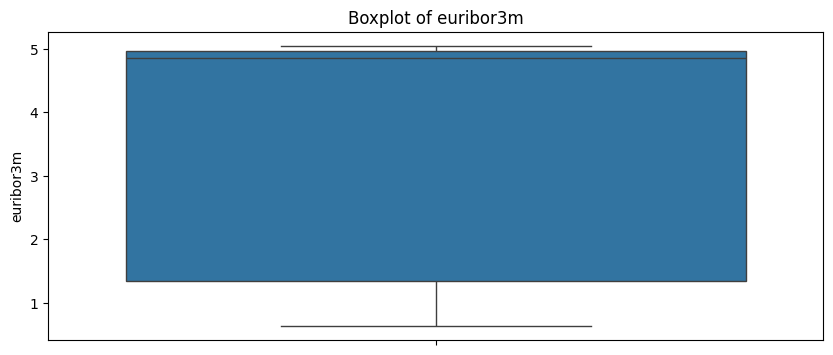

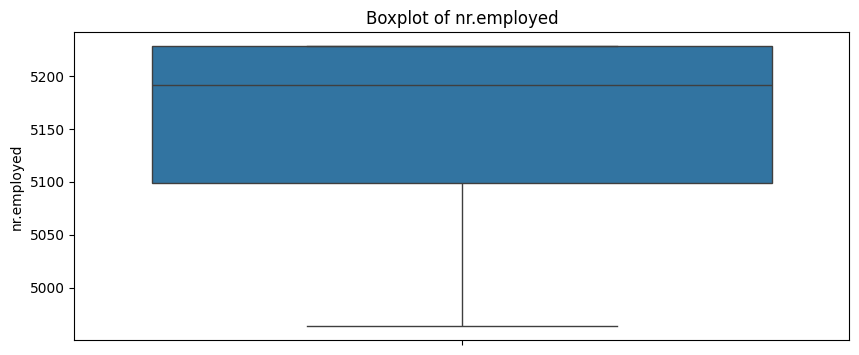

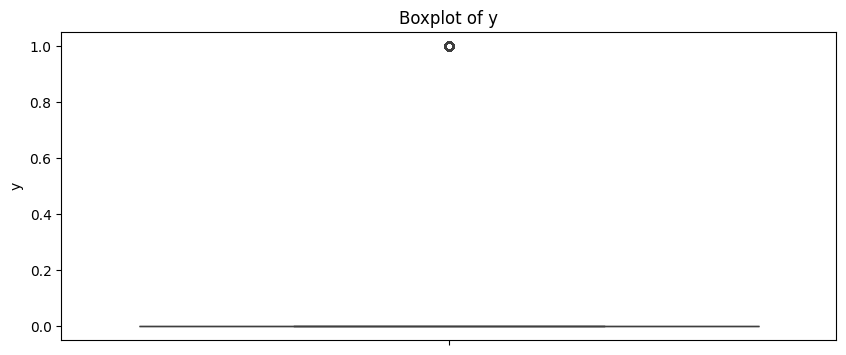

In [7]:
# Boxplot per visualizzare la distribuzione e gli outlier delle variabili numeriche
for col in num_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()